In [ ]:
!pip install kaggle --upgrade
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d singhakash/early-stage-diabetes-risk-prediction-datasets

  0% 0.00/2.52k [00:00<?, ?B/s]
100% 2.52k/2.52k [00:00<00:00, 4.35MB/s]


In [ ]:
!unzip /content/early-stage-diabetes-risk-prediction-datasets.zip

Archive:  /content/early-stage-diabetes-risk-prediction-datasets.zip
  inflating: diabetes_data_upload.csv  


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/diabetes_data_upload.csv')

In [ ]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
df.columns[1:-1]

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [ ]:
for i in df.columns[1:-1]:
  df = pd.get_dummies(data=df, columns= ['{}'.format(i)], drop_first=True)

In [ ]:
df

,Age,class,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,40,Positive,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,Positive,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,Positive,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,Positive,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,Positive,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Positive,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,Positive,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,Positive,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,Negative,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [ ]:
df = pd.get_dummies(df, columns=['class'], drop_first=True)

In [ ]:
df.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


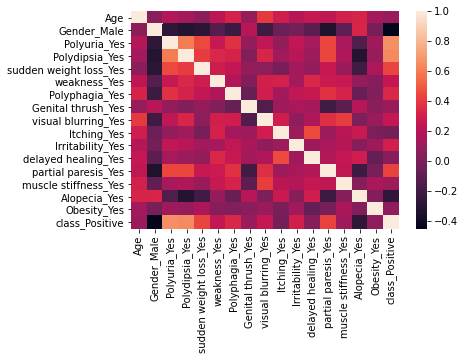

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.corr()['class_Positive'].sort_values()

Gender_Male              -0.449233
Alopecia_Yes             -0.267512
Itching_Yes              -0.013384
delayed healing_Yes       0.046980
Obesity_Yes               0.072173
Age                       0.108679
Genital thrush_Yes        0.110288
muscle stiffness_Yes      0.122474
weakness_Yes              0.243275
visual blurring_Yes       0.251300
Irritability_Yes          0.299467
Polyphagia_Yes            0.342504
partial paresis_Yes       0.432288
sudden weight loss_Yes    0.436568
Polydipsia_Yes            0.648734
Polyuria_Yes              0.665922
class_Positive            1.000000
Name: class_Positive, dtype: float64

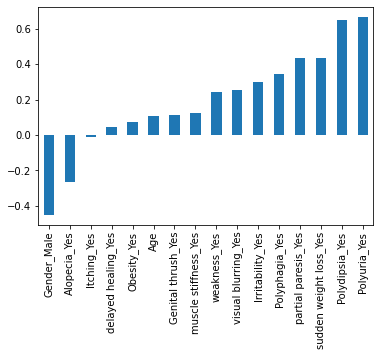

In [ ]:
df.corr()['class_Positive'][:-1].sort_values().plot(kind='bar')

In [ ]:
X = df.drop('class_Positive', axis=1).values

y = df['class_Positive'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(348, 16)

In [ ]:
X_test.shape

(172, 16)

In [ ]:
y_train.shape

(348,)

In [ ]:
y_test.shape

(172,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()

model.add(Dense(units= 30, activation='relu'))

model.add(Dense(units= 15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
validation_data = (X_test,y_test)

In [ ]:
model.fit(X_train,y_train,validation_data=validation_data, epochs=350,callbacks=[early_stop])

Epoch 1/350
11/11 [==============================] - 0s 14ms/step - loss: 0.6577 - accuracy: 0.6638 - val_loss: 0.6266 - val_accuracy: 0.7326
Epoch 2/350
11/11 [==============================] - 0s 5ms/step - loss: 0.5976 - accuracy: 0.7902 - val_loss: 0.5701 - val_accuracy: 0.7674
Epoch 3/350
11/11 [==============================] - 0s 6ms/step - loss: 0.5464 - accuracy: 0.8132 - val_loss: 0.5251 - val_accuracy: 0.7965
Epoch 4/350
11/11 [==============================] - 0s 5ms/step - loss: 0.5042 - accuracy: 0.8563 - val_loss: 0.4825 - val_accuracy: 0.8140
Epoch 5/350
11/11 [==============================] - 0s 4ms/step - loss: 0.4627 - accuracy: 0.8534 - val_loss: 0.4437 - val_accuracy: 0.8256
Epoch 6/350
11/11 [==============================] - 0s 4ms/step - loss: 0.4231 - accuracy: 0.8736 - val_loss: 0.4082 - val_accuracy: 0.8605
Epoch 7/350
11/11 [==============================] - 0s 4ms/step - loss: 0.3859 - accuracy: 0.8937 - val_loss: 0.3747 - val_accuracy: 0.8721
Epoch 8/350


In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.657727,0.663793,0.626626,0.732558
1,0.597569,0.790230,0.570053,0.767442
2,0.546440,0.813218,0.525069,0.796512
3,0.504152,0.856322,0.482523,0.813953
4,0.462742,0.853448,0.443740,0.825581
...,...,...,...,...
147,0.014433,0.994253,0.064046,0.976744
148,0.014725,0.994253,0.063466,0.976744
149,0.014252,0.994253,0.065424,0.976744
150,0.014320,0.994253,0.064597,0.976744


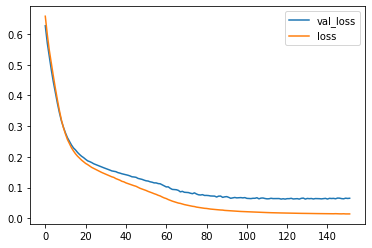

In [ ]:
losses[['val_loss', 'loss']].plot()

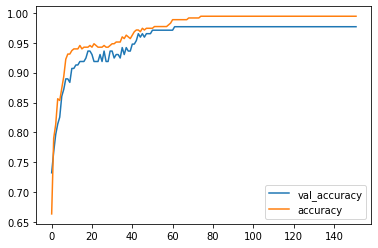

In [ ]:
losses[['val_accuracy', 'accuracy']].plot()

In [ ]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
predictions

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [ ]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        61
           1       0.99      0.97      0.98       111

    accuracy                           0.98       172
   macro avg       0.97      0.98      0.97       172
weighted avg       0.98      0.98      0.98       172



In [ ]:
print(confusion_matrix(y_test, predictions))

[[ 60   1]
 [  3 108]]


In [ ]:
model.save('Diabetes_prediction_using_ann.h5')